# Lab4-Assignment about Named Entity Recognition, Classification and Disambiguation

This notebook describes the assignment of Lab 4 of the text mining course. We assume you have succesfully completed Lab1, Lab2 and Lab3 as welll. Especially Lab2 cis important for completing this assignment.

**Learning goals**
* going from linguistic input format to representing it in a feature space
* working with pretrained word embeddings
* train a supervised classifier (SVM)
* evaluate a supervised classifier (SVM)
* perform feature ablation and gain insight into the contribution of various features
* Learn how to evaluate an entity linking system.
* Learn how to run two entity linking systems (AIDA and DBpedia Spotlight).
* Learn how to interpret the system output and the evaluation results.
* Get insight into differences between the two systems.
* Be able to describe differences between the two methods in terms of their results.
* Be able to propose future improvements based on the observed results.
* Get insight into the difficulty of NED and how this depends on specific entity mentions.

The assignment consists of 2 parts:

* Named Entity Recornition and Classificaiton: excersizes 1 & 2
* Named Entity Disambiguation and Linking: excersizes 3 & 4


## Credits
This notebook was originally created by [Marten Postma](https://martenpostma.github.io) and [Filip Ilievski](http://ilievski.nl) and adapted by Piek vossen

# Named Entity Recognition and Classification

Excercises 2 and 3 focus on Named Entity Recognition and Classification

## [Points: 18] Exercise 1 (NERC): Training and evaluating an SVM using CoNLL-2003

**[4 point] a) Load the CoNLL-2003 training data using the *ConllCorpusReader* and create for both *train.txt* and *test.txt*:**

    [2 points]  -a list of dictionaries representing the features for each training instances, e..g,
    ```
    [
    {'words': 'EU', 'pos': 'NNP'}, 
    {'words': 'rejects', 'pos': 'VBZ'},
    ...
    ]
    ```

    [2 points] -the NERC labels associated with each training instance, e.g.,
    dictionaries, e.g.,
    ```
    [
    'B-ORG', 
    'O',
    ....
    ]
    ```

In [1]:
from nltk.corpus.reader import ConllCorpusReader
### Adapt the path to point to the nerc_datasets folder on your local machine
train = ConllCorpusReader(r'C:\Users\FCH\Desktop\Text_mining\text-mining-ba\lab_sessions\lab4\data\CONLL2003', 'train.txt', ['words', 'pos', 'ignore', 'chunk'])
training_features = []
training_gold_labels = []

for token, pos, ne_label in train.iob_words():
    a_dict = {
       'words': token, 'pos': pos
    }
    training_features.append(a_dict)
    training_gold_labels.append(ne_label)

In [2]:
### Adapt the path to point to the NERC_datasets folder on your local machine
test = ConllCorpusReader(r'C:\Users\FCH\Desktop\Text_mining\text-mining-ba\lab_sessions\lab4\data\CONLL2003', 'test.txt', ['words', 'pos', 'ignore', 'chunk'])

test_features = []
test_gold_labels = []
for token, pos, ne_label in test.iob_words():
    a_dict = {
        'words': token, 'pos': pos
    }
    test_features.append(a_dict)
    test_gold_labels.append(ne_label)

**[2 points] b) provide descriptive statistics about the training and test data:**
* How many instances are in train and test?
* Provide a frequency distribution of the NERC labels, i.e., how many times does each NERC label occur?
* Discuss to what extent the training and test data is balanced (equal amount of instances for each NERC label) and to what extent the training and test data differ?

Tip: you can use the following `Counter` functionality to generate frequency list of a list:

Items in train set: 203621   Percentage: 0.8143015964423969
Items in test set: 46435   Percentage: 0.1856984035576031
Ratio Train/Test: 4.385075912565952 

B-ORG
Training: 6321 			Percentage: 0.03104296708099852
Test: 1661 			Percentage: 0.03577043178636804
ratio Training/Test: 3.805538832028898 

O
Training: 169578 			Percentage: 0.832811939829389
Test: 38323 			Percentage: 0.8253041886508022
ratio Training/Test: 4.424966730162044 

B-MISC
Training: 3438 			Percentage: 0.016884309575142052
Test: 702 			Percentage: 0.015117906751372886
ratio Training/Test: 4.897435897435898 

B-PER
Training: 6600 			Percentage: 0.0324131597428556
Test: 1617 			Percentage: 0.03482287067944438
ratio Training/Test: 4.081632653061225 

I-PER
Training: 4528 			Percentage: 0.022237392017522752
Test: 1156 			Percentage: 0.0248950145364488
ratio Training/Test: 3.916955017301038 

B-LOC
Training: 7140 			Percentage: 0.03506514553999833
Test: 1668 			Percentage: 0.03592118014428771
ratio Training/Test: 4.2805755

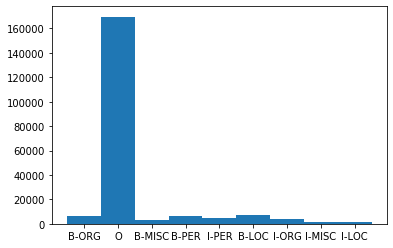

TEST DISTRIBUTION


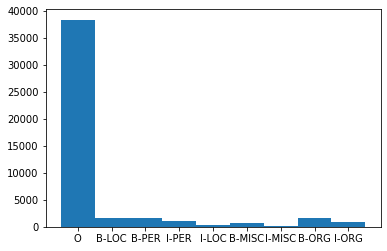

In [3]:
from collections import Counter 
import numpy as np
import matplotlib.pyplot as plt

train_size = len(training_features)
test_size = len(test_features)

print('Items in train set:', train_size, '  Percentage:', train_size/(train_size + test_size))
print('Items in test set:', test_size, '  Percentage:', test_size/(train_size + test_size))
print('Ratio Train/Test:', train_size/test_size, '\n')

count_train = Counter(training_gold_labels)
count_test  = Counter(test_gold_labels)

for i in count_train.keys():
    print(i)
    print('Training:', count_train[i], '\t\t\tPercentage:', count_train[i]/train_size)
    print('Test:', count_test[i], '\t\t\tPercentage:', count_test[i]/test_size)
    print('ratio Training/Test:', count_train[i]/count_test[i], '\n')


def print_counter(counter):
    labels, values = zip(*counter.items())

    indexes = np.arange(len(labels))
    width = 1

    plt.bar(indexes, values, width)
    plt.xticks(indexes , labels)
    plt.show()
    

print('TRAIN DISTRIBUTION')
print_counter(count_train)
print('TEST DISTRIBUTION')
print_counter(count_test)

- We have a train-test split of 81,4% against 18,6%.
- There is a big class imbalance in the data, where the 'O' category is overpopulated. The other classes are equally balanced
- The test and train set both have a large overpopulation of the 'O' category while the other categories have similar proportions with some negligible differences. Normally this would be reduced by using a stratified split.



**[2 points] c) Concatenate the train and test features (the list of dictionaries) into one list. Load it using the *DictVectorizer*. Afterwards, split it back to training and test.**


In [4]:
from sklearn.feature_extraction import DictVectorizer

In [5]:
vec = DictVectorizer()
the_array = vec.fit_transform(training_features + test_features)

training_ = the_array[:len(training_features)]
test_ = the_array[len(training_features):]

**[4 points] d) Train the SVM using the train features and labels and evaluate on the test data. Provide a classification report (sklearn.metrics.classification_report).**
The train (*lin_clf.fit*) might take a while. On my computer, it took 1min 53s, which is acceptable. Training models normally takes much longer. If it takes more than 5 minutes, you can use a subset for training. Describe the results:
* Which NERC labels does the classifier perform well on? Why do you think this is the case?
* Which NERC labels does the classifier perform poorly on? Why do you think this is the case?

In [6]:
from sklearn import svm
from sklearn.metrics import classification_report

In [7]:
lin_clf = svm.LinearSVC()
##### [ YOUR CODE SHOULD GO HERE ]
lin_clf.fit(training_, training_gold_labels)
print(classification_report(test_gold_labels, lin_clf.predict(test_)))

              precision    recall  f1-score   support

       B-LOC       0.81      0.78      0.79      1668
      B-MISC       0.78      0.66      0.72       702
       B-ORG       0.79      0.52      0.63      1661
       B-PER       0.86      0.44      0.58      1617
       I-LOC       0.62      0.53      0.57       257
      I-MISC       0.57      0.59      0.58       216
       I-ORG       0.70      0.47      0.56       835
       I-PER       0.33      0.87      0.48      1156
           O       0.98      0.98      0.98     38323

    accuracy                           0.92     46435
   macro avg       0.72      0.65      0.65     46435
weighted avg       0.94      0.92      0.92     46435



- By considering the f1-score, the class that has the best performance is O. We believe this result can be explained by the following reason: The O label has the best performance of all because it is the most abundant and contain every part of text that cannot be related to an entity (such as verbs, adjectives, pronouns, etc.). Those factors make so that for the O class there are more data for learning and that the machine learning algorithm can easily learn to correlate the use of a POS tag not related to an entity to the O label.
- The worst label for our classifier is I-per, considering the f1-score. Considering that the algorithm does not have any information about ordering of the tokens in the sequence, it may be confusing the B-per and I-per labels. The beggining and inside of a persons name may have the same vector representation and the only way to desambiguate between the two options is by considering the ordering of the tokens. Take for example the names Jonatan Smith and Smith Jonatan. 

**[6 points] e) Train a model that uses the embeddings of these words as inputs. Test again on the same data as in 2d. Generate a classification report and compare the results with the classifier you built in 2d.**

In [8]:
import gensim
word_embedding_model = gensim.models.KeyedVectors.load_word2vec_format(r'C:\Users\FCH\Desktop\Text_mining\text-mining-ba\lab_sessions\GoogleNews-vectors-negative300.bin.gz', binary=True)

In [9]:
def get_w2v(word, word_embedding_model):
    if word in word_embedding_model:
        vector=word_embedding_model[word]
    else: 
        vector=[0]*300
    return vector

In [10]:
training_features = []
training_gold_labels = []
test_features = []
test_gold_labels = []

for token, pos, ne_label in train.iob_words():
    training_features.append(get_w2v(token, word_embedding_model))
    training_gold_labels.append(ne_label)

for token, pos, ne_label in test.iob_words():
    test_features.append(get_w2v(token, word_embedding_model))
    test_gold_labels.append(ne_label)

In [11]:
lin_clf = svm.LinearSVC()
##### [ YOUR CODE SHOULD GO HERE ]
lin_clf.fit(training_features, training_gold_labels)
print(classification_report(test_gold_labels, lin_clf.predict(test_features)))

              precision    recall  f1-score   support

       B-LOC       0.76      0.80      0.78      1668
      B-MISC       0.72      0.70      0.71       702
       B-ORG       0.69      0.64      0.66      1661
       B-PER       0.75      0.67      0.71      1617
       I-LOC       0.51      0.42      0.46       257
      I-MISC       0.60      0.54      0.57       216
       I-ORG       0.48      0.33      0.39       835
       I-PER       0.59      0.50      0.54      1156
           O       0.97      0.99      0.98     38323

    accuracy                           0.93     46435
   macro avg       0.68      0.62      0.64     46435
weighted avg       0.92      0.93      0.92     46435



The results of using embeddings are pretty similar to the ones from the last experiment, the only notable differences are that the f1-score for classification of B-PER is higher for the embedding model, and the f1-scores of I-Loc and I-org are lower for the embedding model. 

## [Points: 10] Exercise 2 (NERC): feature inspection using the [Annotated Corpus for Named Entity Recognition](https://www.kaggle.com/abhinavwalia95/entity-annotated-corpus)
**[6 points] a. Perform the same steps as in the previous exercise. Make sure you end up for both the training part (*df_train*) and the test part (*df_test*) with:**
* the features representation using **DictVectorizer**
* the NERC labels in a list

Please note that this is the same setup as in the previous exercise:
* load both train and test using:
    * list of dictionaries for features
    * list of NERC labels
* combine train and test features in a list and represent them using one hot encoding
* train using the training features and NERC labels

In [12]:
import pandas

In [13]:
##### Adapt the path to point to your local copy of NERC_datasets
path = r'C:\Users\FCH\Desktop\Text_mining\text-mining-ba\lab_sessions\lab4\data\nerc_datasets\kaggle\ner_v2.csv'
kaggle_dataset = pandas.read_csv(path, error_bad_lines=False)

b'Skipping line 281837: expected 25 fields, saw 34\n'


In [14]:
len(kaggle_dataset)

1050795

In [15]:
df_train = kaggle_dataset[:100000]
df_test = kaggle_dataset[100000:120000]
print(len(df_train), len(df_test))

100000 20000


In [16]:
def train_test(remove, df_train=df_train, df_test=df_test, training_labels = df_train['tag'], test_labels = df_test['tag']):
    training_features = []
    test_features = []
    to_drop = ['id', 'sentence_idx', 'tag'] + remove
    
    training_labels = df_train['tag']
    test_labels = df_test['tag']   
    
    df_train = df_train.drop(columns=to_drop)
    df_test = df_test.drop(columns=to_drop)

    for index, row in df_train.iterrows():
        item = row.to_dict()
        training_features.append(item)

    for index, row in df_test.iterrows():
        item = row.to_dict()
        test_features.append(item)

    vec = DictVectorizer()
    the_array = vec.fit_transform(training_features + test_features)

    training = the_array[:len(training_features)]
    test = the_array[len(training_features):]
    
    return training, test, training_labels, test_labels

**[4 points] b. Train and evaluate the model and provide the classification report:**
* use the SVM to predict NERC labels on the test data
* evaluate the performance of the SVM on the test data

Analyze the performance per NERC label.

In [17]:
train, test, train_labels, test_labels = train_test([])
lin_clf = svm.LinearSVC()
##### [ YOUR CODE SHOULD GO HERE ]
lin_clf.fit(train, train_labels)
print(classification_report(test_labels, lin_clf.predict(test)))

C:\Users\FCH\.conda\envs\tm\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       B-art       0.00      0.00      0.00         4
       B-eve       0.00      0.00      0.00         0
       B-geo       0.87      0.84      0.85       741
       B-gpe       0.87      0.94      0.90       296
       B-nat       0.80      0.50      0.62         8
       B-org       0.73      0.66      0.70       397
       B-per       0.81      0.81      0.81       333
       B-tim       0.93      0.84      0.88       393
       I-geo       0.97      0.96      0.97       156
       I-gpe       0.67      1.00      0.80         2
       I-nat       1.00      1.00      1.00         4
       I-org       0.95      0.93      0.94       321
       I-per       0.95      0.98      0.96       319
       I-tim       0.98      0.87      0.92       108
           O       0.99      0.99      0.99     16918

    accuracy                           0.97     20000
   macro avg       0.77      0.76      0.76     20000
weighted avg       0.97   

In general the results show a high recall and precision value for all the classification labels. Furthermore, the weighted average is also high (0.97). The main source of errors of the model are the minority classes, which have had fewer training instances and therefore have the lowest accuracy.

# Entity Linking

Excersizes 3 and 4 focus on Entity linking

### Excersize 3 (NEL): Quantitative analysis  [Points: 15] 

In this assignment, you are going to work with two systems for entity linking: AIDA and DBpedia Spotlight. You will run them on an entity linking dataset and evaluate their performance. You will perform both quantitative and qualitative analysis of their output, and run one of these systems on your own text. We will reflect on the results of these tasks.

**Note:** We will use the dataset Reuters-128 in this assignment. This dataset was introduced in the notebook 'Lab4.3-Entity-linking-tools', so you probably have it already (in case you do not have it make sure you download it from Canvas first and put it in the same location as this notebook). 


**Exercise 1a** Write code that runs both systems on the full Reuters-128 dataset. (5 points)

In [18]:
from rdflib import Graph, URIRef
from tqdm import tqdm ## to create progress bar to measure progress
import sys
import requests
import urllib
import urllib.parse
from urllib.request import urlopen, Request
from urllib.parse import urlencode
import xml.etree.cElementTree as ET
from lxml import etree
import time
import json
# import time
# import our own utility functions and classes
import lab4_utils as utils
import lab4_classes as classes

In [19]:
import ssl
context = ssl._create_unverified_context()

In [20]:
# Run both systems on the full Reuters-128 dataset
def aida_disambiguation(articles, aida_url):
    """
    Perform disambiguation with AIDA.
    """
    with tqdm(total=len(articles), file=sys.stdout) as pbar:  
        for i, article in enumerate(articles):
            
            original_content = article.content
            new_content=original_content
            for entity in reversed(article.entity_mentions):
                entity_span=new_content[entity.begin_index: entity.end_index]
                new_content=new_content[:entity.begin_index] + '[[' + entity_span + ']]' + new_content[entity.end_index:]

            params={"text": new_content, "tag_mode": 'manual'}
            request = Request(aida_url, urlencode(params).encode())
            this_json = urlopen(request, context = context).read().decode('unicode-escape')
            try:
                results=json.loads(this_json)
            except:
                continue

            dis_entities={}
            for dis_entity in results['mentions']:

                if 'bestEntity' in dis_entity.keys():
                    best_entity = dis_entity['bestEntity']['kbIdentifier']
                    clean_url = best_entity[5:] #SKIP YAGO:
                else:
                    clean_url = 'NIL'
                dis_entities[str(dis_entity['offset'])] = clean_url 
            
            for entity in article.entity_mentions:
                start = entity.begin_index
                try:
                    dis_url = str(dis_entities[str(start)])  
                except:
                    dis_url = 'NIL'
                entity.aida_link = dis_url

            pbar.set_description('processed: %d' % (1 + i))
            pbar.update(1)
    return articles

def spotlight_disambiguate(articles, spotlight_url):
    """
    Perform disambiguation with DBpedia Spotlight.
    """
    with tqdm(total=len(articles), file=sys.stdout) as pbar:
        for i, article in enumerate(articles):
            # Similar as with AIDA, we first prepare the document text and the mentions
            # in order to provide these to Spotlight as input.
            
            # We build up the XML structure that Spotligh wants as input
            # The next function Element creates the XML element with the text attribute
            annotation = etree.Element("annotation", text=article.content)
            
            # We iterate over the eneity mentions from our Reuters data to create the surface form elements
            for mention in article.entity_mentions:
                sf = etree.SubElement(annotation, "surfaceForm")
                sf.set("name", mention.mention)
                sf.set("offset", str(mention.begin_index))
            my_xml=etree.tostring(annotation, xml_declaration=True, encoding='UTF-8')
            # Send a disambiguation request to spotlight
            results=requests.post(spotlight_url, urllib.parse.urlencode({'text':my_xml, 'confidence': 0.5}), 
                                  headers={'Accept': 'application/json'})
            # Note that you can adjust the confidence value. Check the online demo to see the effect. 
            # What will happen with the recall and precision if you increase the confidence?
            
            # Process the results and normalize the entity URIs
            
            if not results:
                continue
            
            j=results.json()
            dis_entities={}
            if 'Resources' in j: 
                resources=j['Resources']
            else: 
                resources=[]
            for dis_entity in resources:
                dis_entities[str(dis_entity['@offset'])] = utils.normalizeURL(dis_entity['@URI'])
            
            # Let's now store the URLs by Spotlight to our class for later analysis.
            for entity in article.entity_mentions:
                start = entity.begin_index
                if str(start) in dis_entities:
                    dis_url = dis_entities[str(start)]
                else:
                    dis_url = 'NIL'
                entity.spotlight_link = dis_url
    
            # The next two lines only update the progress bar
            pbar.set_description('processed: %d' % (1 + i))
            pbar.update(1)
                
            # Pause for 100ms to prevent overloading the server
            time.sleep(0.1)
    return articles

In [21]:
reuters_file = 'Reuters-128.ttl'
aida_disambiguation_url = "https://gate.d5.mpi-inf.mpg.de/aida/service/disambiguate"
spotlight_disambiguation_url = "http://model.dbpedia-spotlight.org/en/disambiguate"

articles = utils.load_article_from_nif_file(reuters_file)
processed_aida = aida_disambiguation(articles, aida_disambiguation_url)

processed: 1:   1%|▌                                                                   | 1/128 [00:04<08:36,  4.06s/it]

C:\Users\FCH\.conda\envs\tm\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: invalid escape sequence '\/'


processed: 128:  96%|█████████████████████████████████████████████████████████████▌  | 123/128 [03:26<00:08,  1.68s/it]


In [34]:
processed_spotlight =spotlight_disambiguate(processed_aida, spotlight_disambiguation_url)

processed: 64:  47%|██████████████████████████████▉                                   | 60/128 [01:22<01:33,  1.38s/it]


**Exercise 1b** Write code that evaluates the two systems on this dataset by computing their overall precision, recall, and F1-score. (5 points)

In [43]:
# Write a function to compute the precision, recall, and F1-score for each of the systems on this dataset

def evaluate_entity_linking(system_decisions, gold_decisions):
    
    tp, fp, fn = 0, 0, 0
    
    for gold_entity,system_entity in zip(gold_decisions,system_decisions):
        if gold_entity=='NIL' and system_entity=='NIL': continue
        if gold_entity==system_entity:
            tp+=1
        else:
            if gold_entity!='NIL':
                fn+=1
            if system_entity!='NIL':
                fp+=1

#     print('TP: %d; \nFP: %d, \nFN: %d' % (tp, fp, fn))            

    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    f1=2*precision*recall/(precision+recall)
    
    return precision, recall, f1


In [55]:
decisions_aida = []
gold_aida = []
for article in processed_aida:
    decisions_aida += [entity.aida_link for entity in article.entity_mentions]
    gold_aida += [entity.gold_link for entity in article.entity_mentions]

decisions_spotlight = []
gold_spotlight = []
for article in processed_spotlight:
    decisions_spotlight += [entity.spotlight_link for entity in article.entity_mentions]
    gold_spotlight += [entity.gold_link for entity in article.entity_mentions]
    
precision_a, recall_a, f1_a = evaluate_entity_linking(decisions_aida, gold_aida)
print('AIDA System:\nPrecision:', precision_a, ' Recall:', recall_a, ' F1:', f1_a)
precision_s, recall_s, f1_s = evaluate_entity_linking(decisions_aida, gold_spotlight)
print('Spotlight System:\nPrecision:', precision_s, ' Recall:', recall_s, ' F1:', f1_s)

AIDA System:
Precision: 0.61875  Recall: 0.45692307692307693  F1: 0.5256637168141594
Spotlight System:
Precision: 0.61875  Recall: 0.45692307692307693  F1: 0.5256637168141594


In [40]:
processed_spotlight[0].entity_mentions[1]

**Question 1c** What is the F1-score per system? Which system performs better? Is that also the better system in terms of precision and recall? Which is higher and what does that mean (hint: think of NIL entities)?(5 points)

According to our results, both systems have the same performance

### Excersize 4 (NEL): Qualitative analysis [Points: 15] 

**Exercise 2a** Check the entity disambiguation by AIDA against the gold entities on the document with identifier "http://aksw.org/N3/Reuters-128/82#char=0,1370" (write code to print the entity mentions, gold links and AIDA links). (2 points)

In [45]:
correct_article = [article for article in articles if article.identifier == 'http://aksw.org/N3/Reuters-128/82#char=0,1370'][0]

In [54]:
for e in correct_article.entity_mentions:
    print("ENTITY GOLD :", e.gold_link,", ENTITY AIDA :", e.aida_link)

ENTITY GOLD : Reuters , ENTITY AIDA : Reuters_Group
ENTITY GOLD : NIL , ENTITY AIDA : NIL
ENTITY GOLD : Tokyo_Stock_Exchange , ENTITY AIDA : Tokyo
ENTITY GOLD : London_Stock_Exchange , ENTITY AIDA : NIL
ENTITY GOLD : NIL , ENTITY AIDA : Edward_Hogg
ENTITY GOLD : Reuters , ENTITY AIDA : Reuters
ENTITY GOLD : London , ENTITY AIDA : London


In [56]:
correct_article.content

rdflib.term.Literal('Exchanges and telecommunications authorities should abolish their restrictions on full and free dissemination of information to the investment and banking communities, Reuters Holdings Plc RTRS.L chairman Sir Christopher Hogg said. In the 1986 annual repoprt, he said lengthy negotiations had brought agreement with the Tokyo and London Stock Exchanges for fuller, but still not complete, access to market data through Reuter services. Many other markets maintain restrictions, he added. Hogg said members of some markets appear to believe that information restrictions protected their interests. In other cases, exchanges seem to be limiting the distribution of data in order to provide competitive advantage to their own commercial information businesses. He also noted that despite increasing liberalisation in the telecommunications field, some countries continue to protect their state monopolies at the expense of other economic sectors. Reuter dealing services remain excl

You can see in this document that one of the mentions of "Tokyo" is disambiguated wrongly by AIDA as `Tokyo` (it should be `Tokyo_Stock_Exchange`). Knowing how AIDA works, what would be your explanation for this error? (4 points)

One possible explanation for this error is that the entities that are mentioned in the surrounding context of the word Tokyo, such as London and Reuters, are more often connected with the entity Tokyo (which means those entities have connections with higher weights). And since the AIDA algorithm ranks entities based on this connectivity weight Tokyo got predicted. 

**Exercise 2b** Check the entity disambiguation by Spotlight against the gold entities on the document "http://aksw.org/N3/Reuters-128/36#char=0,1146" (write code to print the entity mentions, gold links and Spotlight links). (2 points)

In [64]:
correct_article = [article for article in articles if article.identifier == 'http://aksw.org/N3/Reuters-128/36#char=0,1146'][0]

In [65]:
for entity in correct_article.entity_mentions:
    print('entity:', entity.mention ,', SPOTLIGHT: ', entity.spotlight_link, ', GL:', entity.gold_link)

entity: U.S. Treasury , SPOTLIGHT:  United_States_Department_of_the_Treasury , GL: United_States_Department_of_the_Treasury
entity: Group of Five , SPOTLIGHT:  Group_of_Five , GL: Group_of_Five
entity: Gerhard Stoltenberg , SPOTLIGHT:  Gerhard_Stoltenberg , GL: Gerhard_Stoltenberg
entity: Bundesbank , SPOTLIGHT:  German_Federal_Bank , GL: Deutsche_Bundesbank
entity: Karl Otto Poehl , SPOTLIGHT:  NIL , GL: Karl_Otto_Pöhl
entity: Edouard Balladur , SPOTLIGHT:  Édouard_Balladur , GL: Édouard_Balladur
entity: Jacques de Larosiere , SPOTLIGHT:  NIL , GL: Jacques_de_Larosière
entity: Kiichi Miyazawa , SPOTLIGHT:  Kiichi_Miyazawa , GL: Kiichi_Miyazawa
entity: Satoshi Sumita , SPOTLIGHT:  NIL , GL: Satoshi_Sumita
entity: Robin Leigh Pemberton , SPOTLIGHT:  NIL , GL: Robin_Leigh-Pemberton,_Baron_Kingsdown
entity: Group of Seven , SPOTLIGHT:  Group_of_Seven , GL: G7
entity: Giovanni Goria , SPOTLIGHT:  Giovanni_Goria , GL: Giovanni_Goria
entity: Treasury , SPOTLIGHT:  HM_Treasury , GL: United_St

You can see in this document that the mention of "Group of Seven" is disambiguated wrongly by Spotlight as `G8` (it should be `G7`). Knowing how Spotlight works, what would be your explanation for this error? (4 points)

In our results such mistake is not found. Nonetheless, one possible explanation for the error is that during the disambiguation phase, the information retrieval vector representation of G8 was closer to query vector. Indeed, the G8 and G7 groups are often discribed with similar words, since both are governamental groups with almost all the same members and political agenda

**Question 2c** In the document with identifier "http://aksw.org/N3/Reuters-128/67#char=0,1627":
- both systems correctly decide that "Michel Dufour" is a `NIL` entity with no representation in the English Wikipedia. 
- however, Spotlight later decides that "Dufour" refers to `Guillaume-Henri_Dufour`

How would you help Spotlight fix this error? (Hint: think of how you would know that "Dufour" is a NIL entity in that document) (3 points)

In [62]:
correct_article = [article for article in articles if article.identifier == 'http://aksw.org/N3/Reuters-128/67#char=0,1627'][0]
processed_both = spotlight_disambiguate([correct_article], spotlight_disambiguation_url)
processed_aida=aida_disambiguation([correct_article], aida_disambiguation_url)

for entity in processed_both[0].entity_mentions:
    print('entity:', entity.mention ,', SPOTLIGHT:', entity.spotlight_link, ', AIDA:', entity.aida_link, ', GL:', entity.gold_link)

processed: 1: 100%|██████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.71it/s]
entity: Dominion Textile Inc , SPOTLIGHT: NIL , AIDA: NIL , GL: Dominion_Textile
entity: Burlington Industries Inc , SPOTLIGHT: NIL , AIDA: NIL , GL: Burlington_Industries
entity: Michel Dufour , SPOTLIGHT: NIL , AIDA: NIL , GL: NIL
entity: Reuters , SPOTLIGHT: Reuters , AIDA: Reuters , GL: Reuters
entity: Dominion Textile , SPOTLIGHT: Dominion_Textile , AIDA: Dominion_Textile , GL: Dominion_Textile
entity: Dufour , SPOTLIGHT: Guillaume-Henri_Dufour , AIDA: Antoine_Dufour , GL: NIL
entity: Dominion Textile , SPOTLIGHT: Dominion_Textile , AIDA: Dominion_Textile , GL: Dominion_Textile
entity: Thomas Bell , SPOTLIGHT: Thom_Bell , AIDA: Thom_Bell , GL: NIL
entity: Dominion Textile , SPOTLIGHT: Dominion_Textile , AIDA: Dominion_Textile , GL: Dominion_Textile
entity: Avondale Mills , SPOTLIGHT: Avondale_Mills , AIDA: NIL , GL: NIL
entity: Dufour , SPOTLIGHT: Guillaume-Henri

C:\Users\FCH\.conda\envs\tm\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: invalid escape sequence '\/'


By applying coreference resolution to the text, it would be possible to associate both mentions of "Dufour" to the same entity (NIL). 

## End of this notebook